In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\Rajasree Unnithan R\Downloads\fake_transactional_data_24 (1).csv")

In [2]:
unique_business_df = df.loc[pd.to_numeric(df['to_randomly_generated_account'], errors='coerce').isna(), ['to_randomly_generated_account']].drop_duplicates()

In [3]:
def remove_non_alphabets(s):
    return ''.join(char if char.isalpha() else ' ' for char in s)

In [4]:
unique_business_df['cleaned_recipient_account'] = unique_business_df['to_randomly_generated_account'].apply(lambda x: remove_non_alphabets(str(x)))

In [5]:
from nltk.tokenize import word_tokenize
unique_business_df['words'] = unique_business_df['cleaned_recipient_account'].apply(lambda x: word_tokenize(str(x).lower()))

In [6]:
similarity_mapping = {
    'Cafe' : ['coffee', 'cafe'],
    'Roasterie/Tea Shop' : ['tea', 'bean', 'roasterie'],
    'Book Store' : ['book', 'bookshop'], 
    'Bar':['bar', 'watering'],
    'Alcohol Store' : ['wine', 'alcohol', 'liquor','whiskey','alcohol'],
    'Pub' : ['pub'],
    'Fast Food' : ['kebab', 'lunch', 'sandwich'],
    'Restaurant/Takeaway' : ['restaurant', 'seafood' , 'steak', 'takeaway'],
    'Cinema' : ['cinema','dvd'],
    'Streaming Service' : ['streaming'],
    'Home' : ['diy', 'home'],
    'Cook Shop' : ['cookshop'],
    'Supermarket' : ['supermarket'],
    'Greengrocer' : ['greengrocer'],
    'Pets' : ['pet'],
    "Children's Shop" : ['child','toy', 'kids', 'childrens', 'childrends', 'school'],
    'Clothing Store' : ['clothing', 'fashion', 'clothes'],
    'Gym' : ['gym'],
    'Sports Store' : ['sport','sportsware','running','trainer'],
    'Tech Store' : ['tech','electronics'],
    'Butcher' : ['butcher', 'butchers'],
    'Turkey Farm' : [ 'turkey'],
    'Gaming' : ['game'],
    'Accessory Shop' : ['jewllery', 'accessory'],
    'Flower Shop' : ['florist'],
    'Department Store' : ['department']
}

In [7]:
unique_business_df['group'] = unique_business_df['words'].apply(lambda x: next((group for group, values in similarity_mapping.items() if any(word in values for word in x)), 'OTHER'))

In [8]:
unique_business_df = unique_business_df[['to_randomly_generated_account', 'group']].drop_duplicates()

In [9]:
mapped_df = pd.merge(df, unique_business_df, on='to_randomly_generated_account', how='left')

In [10]:
mapped_df['group'] = mapped_df['group'].fillna('Personal Accounts')

In [11]:
mapped_df.columns

Index(['from_totally_fake_account', 'monopoly_money_amount',
       'to_randomly_generated_account', 'not_happened_yet_date', 'group'],
      dtype='object')

In [12]:
df_wide = mapped_df.pivot_table(index='from_totally_fake_account', columns='group', values='monopoly_money_amount', aggfunc='sum')

In [13]:
df_wide = df_wide.fillna(0)
df_wide = df_wide.reset_index()

In [14]:
df_wide

group,from_totally_fake_account,Accessory Shop,Alcohol Store,Bar,Book Store,Butcher,Cafe,Children's Shop,Cinema,Clothing Store,...,Personal Accounts,Pets,Pub,Restaurant/Takeaway,Roasterie/Tea Shop,Sports Store,Streaming Service,Supermarket,Tech Store,Turkey Farm
0,1000.0,0.0,114.98,3081.0,8.0,0.00,1955.20,160.0,252.0,145.0,...,18213.05,529.0,1530.90,1613.39,68.18,0.0,107.88,681.93,0.0,0.0
1,1002.0,0.0,154.97,2511.5,0.0,0.00,483.75,268.0,309.0,0.0,...,6467.30,0.0,1947.97,1503.67,61.82,175.0,107.88,1045.61,0.0,0.0
2,1006.0,0.0,107.95,2237.5,412.0,1484.98,2075.95,1480.0,227.0,65.0,...,4062.70,0.0,1946.80,1576.16,31.36,0.0,107.88,931.20,0.0,0.0
3,1018.0,0.0,39.99,1691.5,20.0,1016.00,32.60,59.0,28.0,2009.0,...,4307.70,30.0,832.00,1771.22,52.73,84.0,0.00,1288.22,0.0,0.0
4,1053.0,0.0,179.97,2402.0,0.0,18.00,725.85,133.0,222.0,2561.0,...,6305.35,0.0,1473.21,1731.32,127.27,115.0,107.88,1119.22,79.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8137,100931.0,0.0,279.95,3254.0,353.0,1220.18,639.05,175.0,335.0,0.0,...,6812.75,0.0,2376.58,1273.04,148.64,1690.0,107.88,1086.86,170.0,0.0
8138,100934.0,0.0,93.98,2818.5,518.0,0.00,598.90,0.0,185.0,195.0,...,5067.00,0.0,1595.60,1448.38,35.00,0.0,107.88,5716.51,0.0,0.0
8139,100947.0,0.0,78.96,3358.0,503.0,27.00,758.00,120.0,297.0,131.0,...,4796.98,0.0,1560.29,1779.67,69.09,90.0,107.88,5700.33,276.0,0.0
8140,100986.0,0.0,128.95,2850.0,35.0,0.00,65.10,0.0,258.0,197.0,...,2651.87,10.0,2011.13,1720.79,40.00,1007.0,107.88,3863.01,0.0,0.0


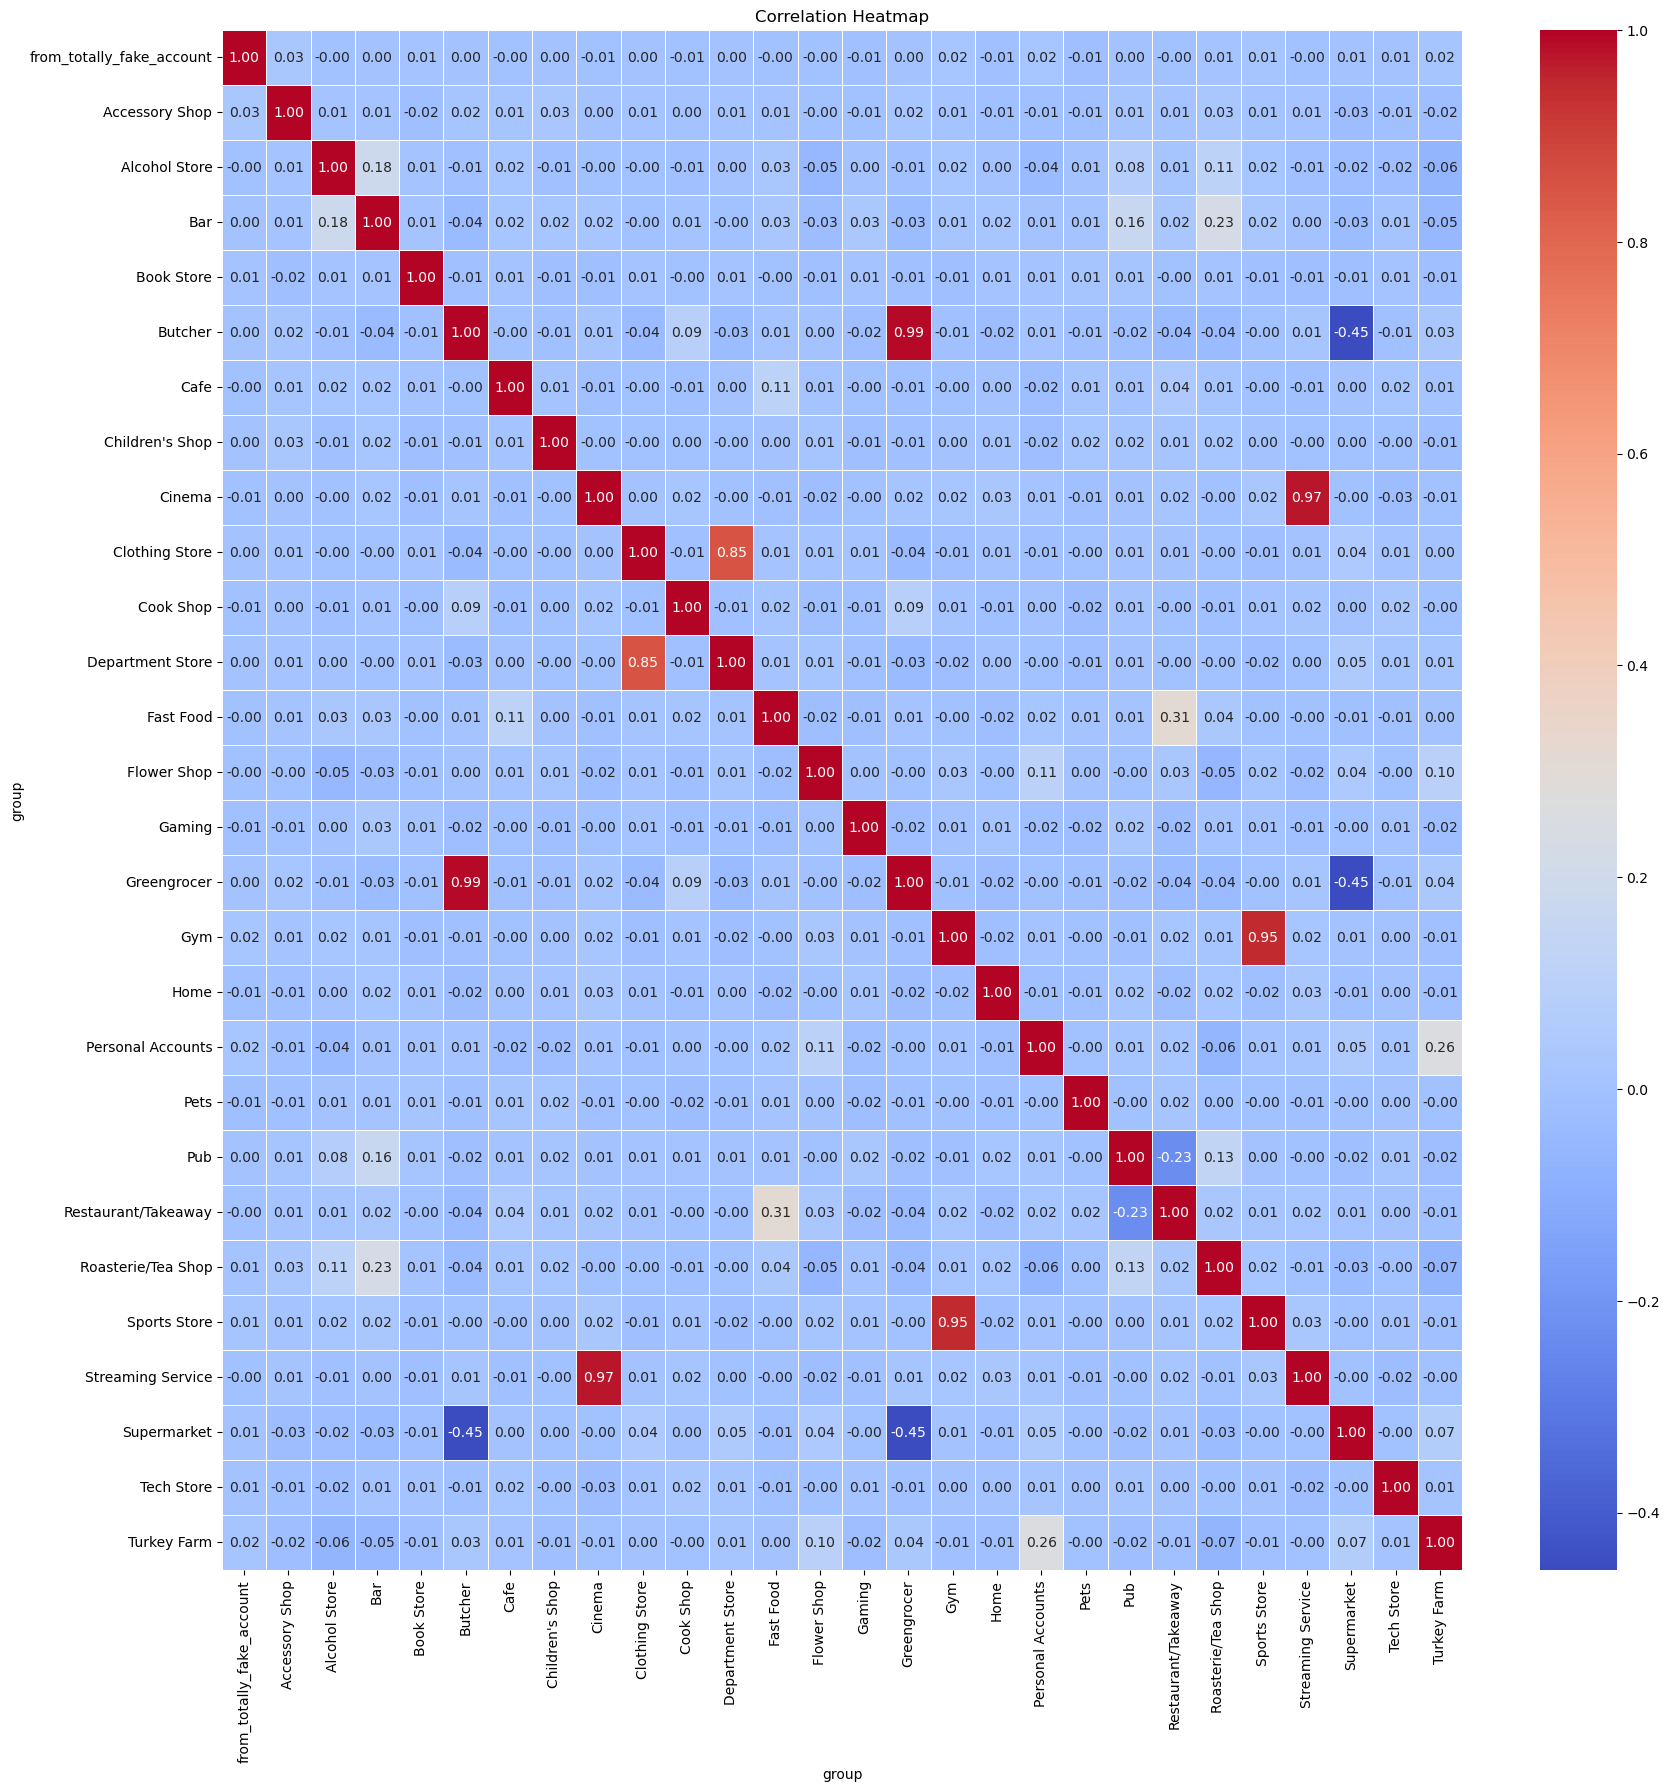

In [15]:
correlation_matrix = df_wide.corr()

# Create a heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df_wide, test_size=0.25, random_state=42)

## K-Means 

C:\Users\Rajasree Unnithan R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rajasree Unnithan R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rajasree Unnithan R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rajasree Unnithan R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init

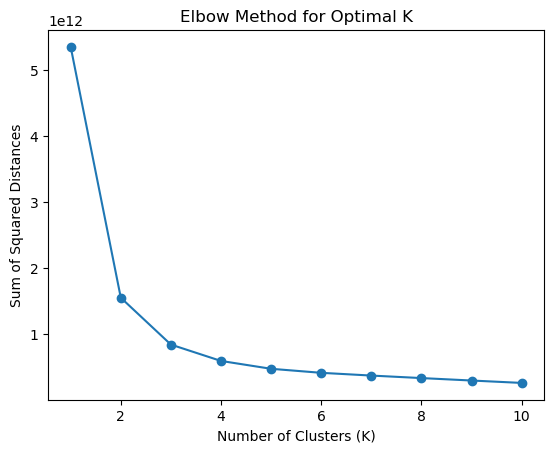

In [17]:
# Loop over values of k from 1 to 10
from sklearn.cluster import KMeans
k_values = range(1, 11)
inertia_values = []

# Fit k-means for different K values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.show()

C:\Users\Rajasree Unnithan R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rajasree Unnithan R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rajasree Unnithan R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rajasree Unnithan R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init

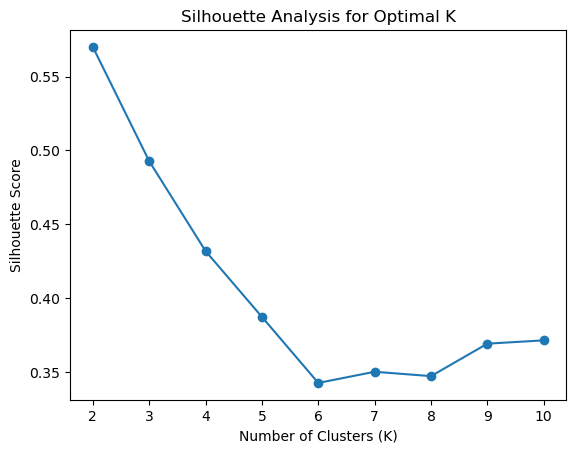

In [18]:
from sklearn.metrics import silhouette_score

k_values = range(2, 11)
silhouette_scores = []

# Fit k-means for different K values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train)
    silhouette_avg = silhouette_score(X_train, labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

## DBScan

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import ParameterGrid
from sklearn.datasets import make_blobs

# Generate synthetic data with clusters of different densities
X_train, _ = make_blobs(n_samples=30000, centers=4, cluster_std=[1.0, 0.7, 0.5,0.3], random_state=42)

param_grid = {'eps': [0.1, 0.5, 1.0, 1.5], 'min_samples': [3, 5, 10, 15]}
best_score = -1
best_params = None

for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(**params)
    labels = dbscan.fit_predict(X_train)
    score = silhouette_score(X_train, labels)
    
    if score > best_score:
        best_score = score
        best_params = params

print("Best Hyperparameters:", best_params)
print("Best Silhouette Score:", best_score)

Best Hyperparameters: {'eps': 1.5, 'min_samples': 3}
Best Silhouette Score: 0.8644859897854097


In [20]:
'''
# Define the hyperparameter grid
param_grid = {'eps': np.linspace(0.1, 2.0, 20), 'min_samples': range(3, 16)}

# Initialize lists to store hyperparameters and corresponding silhouette scores
eps_values = []
min_samples_values = []
silhouette_scores = []

# Perform grid search and compute silhouette scores
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(**params)
    labels = dbscan.fit_predict(X_train)
    score = silhouette_score(X_train, labels)
    
    eps_values.append(params['eps'])
    min_samples_values.append(params['min_samples'])
    silhouette_scores.append(score)

# Reshape the data for plotting
eps_values = np.array(eps_values).reshape(len(param_grid['eps']), len(param_grid['min_samples']))
min_samples_values = np.array(min_samples_values).reshape(len(param_grid['eps']), len(param_grid['min_samples']))
silhouette_scores = np.array(silhouette_scores).reshape(len(param_grid['eps']), len(param_grid['min_samples']))

# Plot the results
fig, ax = plt.subplots(figsize=(10, 8))
c = ax.contourf(eps_values, min_samples_values, silhouette_scores, cmap='viridis', levels=20)
plt.colorbar(c, label='Silhouette Score')
plt.xlabel('EPS')
plt.ylabel('Min Samples')
plt.title('Silhouette Scores for DBSCAN Hyperparameters')
plt.show()
'''

"\n# Define the hyperparameter grid\nparam_grid = {'eps': np.linspace(0.1, 2.0, 20), 'min_samples': range(3, 16)}\n\n# Initialize lists to store hyperparameters and corresponding silhouette scores\neps_values = []\nmin_samples_values = []\nsilhouette_scores = []\n\n# Perform grid search and compute silhouette scores\nfor params in ParameterGrid(param_grid):\n    dbscan = DBSCAN(**params)\n    labels = dbscan.fit_predict(X_train)\n    score = silhouette_score(X_train, labels)\n    \n    eps_values.append(params['eps'])\n    min_samples_values.append(params['min_samples'])\n    silhouette_scores.append(score)\n\n# Reshape the data for plotting\neps_values = np.array(eps_values).reshape(len(param_grid['eps']), len(param_grid['min_samples']))\nmin_samples_values = np.array(min_samples_values).reshape(len(param_grid['eps']), len(param_grid['min_samples']))\nsilhouette_scores = np.array(silhouette_scores).reshape(len(param_grid['eps']), len(param_grid['min_samples']))\n\n# Plot the results\n

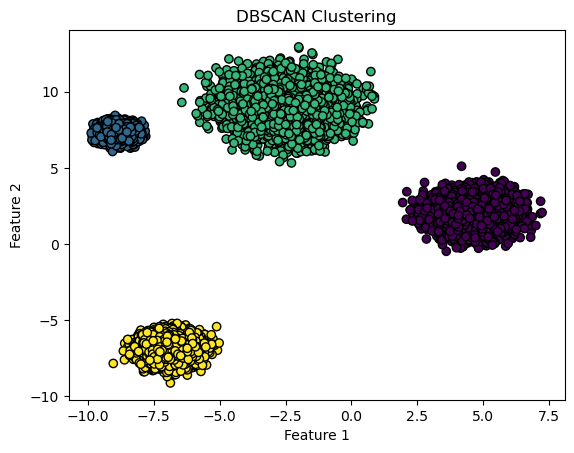

In [21]:
# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples= 3)
labels = dbscan.fit_predict(X_train)

# Visualize the results
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## HDBScan

In [24]:
from sklearn.cluster import HDBSCAN

# Generate synthetic data with clusters of different densities
X_train, _ = make_blobs(n_samples=30000, centers=4, cluster_std=[1.0, 0.7, 0.5, 0.3], random_state=42)

param_grid = {'min_cluster_size': [50, 100, 200, 500], 'min_samples': [1, 3, 5, 10]}
best_score = -1
best_params = None

for params in ParameterGrid(param_grid):
    hdbscan = HDBSCAN(**params)
    labels = hdbscan.fit_predict(X_train)
    
    # Check if there are at least two unique labels
    unique_labels = len(np.unique(labels))
    if unique_labels > 1:
        score = silhouette_score(X_train, labels)
        if score > best_score:
            best_score = score
            best_params = params

print("Best Hyperparameters:", best_params)
print("Best Silhouette Score:", best_score)

Best Hyperparameters: {'min_cluster_size': 50, 'min_samples': 1}
Best Silhouette Score: 0.8644859897854097


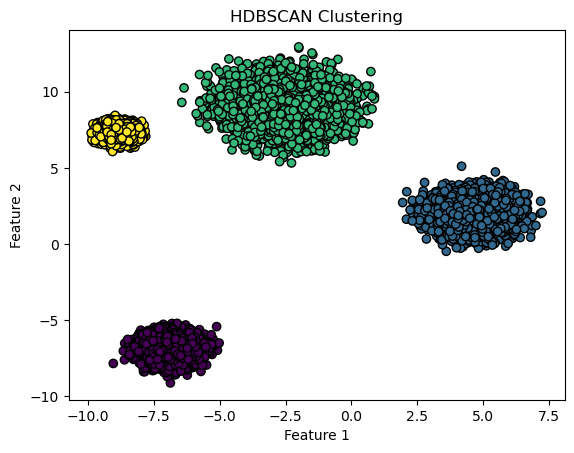

In [26]:
# Apply HDBSCAN
hdbscan = HDBSCAN(min_cluster_size= 50, min_samples= 1)
labels = hdbscan.fit_predict(X_train)

# Visualize the results
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='k')
plt.title('HDBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## OPTICS

In [27]:
from sklearn.cluster import OPTICS

# Generate synthetic data with clusters of different densities
X_train, _ = make_blobs(n_samples=30000, centers=4, cluster_std=[1.0, 0.7, 0.5, 0.3], random_state=42)

param_grid = {'eps': [0.1, 0.5, 1.0, 1.5], 'min_samples': [3, 5, 10, 15]}
best_score = -1
best_params = None

for params in ParameterGrid(param_grid):
    optics = OPTICS(**params)
    labels = optics.fit_predict(X_train)
    
    # Check if there are at least two unique labels
    unique_labels = len(np.unique(labels))
    if unique_labels > 1:
        score = silhouette_score(X_train, labels)
        if score > best_score:
            best_score = score
            best_params = params

print("Best Hyperparameters:", best_params)
print("Best Silhouette Score:", best_score)

Best Hyperparameters: {'eps': 0.1, 'min_samples': 3}
Best Silhouette Score: 0.025583734731017705


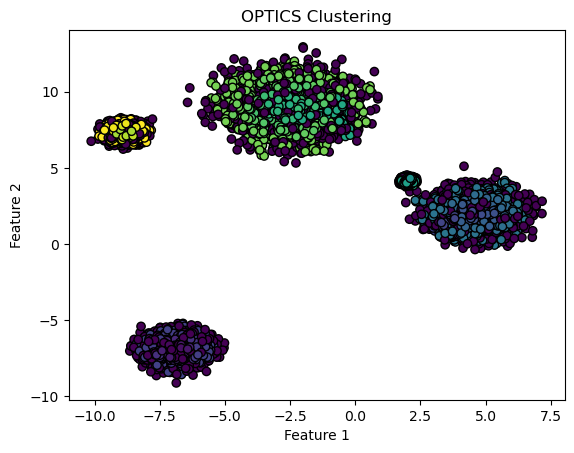

In [30]:
# Apply OPTICS
optics = OPTICS(eps= 0.1, min_samples= 3)
labels = optics.fit_predict(X_train)

# Visualize the results
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='k')
plt.title('OPTICS Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()